In [1]:
# knitr::opts_chunk$set(echo = TRUE)

In [2]:
# nifty code using the pacman package
# it checks if the packages specified below are installed, if not, they will be installed, if yes, they will be loaded
# if (!require("pacman")) install.packages("pacman")
# pacman::p_load(rstudioapi, tidyverse)

# set the current working directory to the one where this file is
# current_working_dir <- dirname(rstudioapi::getActiveDocumentContext()$path)
# setwd(current_working_dir)

# Homework (in book: 4.10.1) 
In this exercise, you will perform the analysis corresponding to Figure 4.1 on page 70. 

1. Load in the data set `ELP_frequency.csv` into your R session. 

In [3]:
library("dplyr")
library("ggplot2")
df = read.csv("ELP_frequency.csv")
df


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Word,Freq,RT
<fct>,<int>,<dbl>
thing,55522,621.77
life,40629,519.56
door,14895,507.38
angel,3992,636.56
beer,3850,587.18
disgrace,409,705.00
kitten,241,611.26
bloke,238,794.35
mocha,66,725.04


2. Use `mutate()` to apply the `log10()` function to the frequency column (`Freq`) (logarithms will be explained in Chapter 5).

In [4]:
df = mutate(df, Freq=log10(Freq))
df

Word,Freq,RT
<fct>,<dbl>,<dbl>
thing,4.744465,621.77
life,4.608836,519.56
door,4.173041,507.38
angel,3.601191,636.56
beer,3.585461,587.18
disgrace,2.611723,705.00
kitten,2.382017,611.26
bloke,2.376577,794.35
mocha,1.819544,725.04


3. Fit a linear model in which response time (`RT`) are modeled as a function of log frequencies. 

In [5]:
# The log10 function is already applied in-place on the dataframe
# So we dont need ot apply it again
model = lm(df$RT ~ df$Freq, data=df)

4. Create a plot for the relationship between these two variables. 

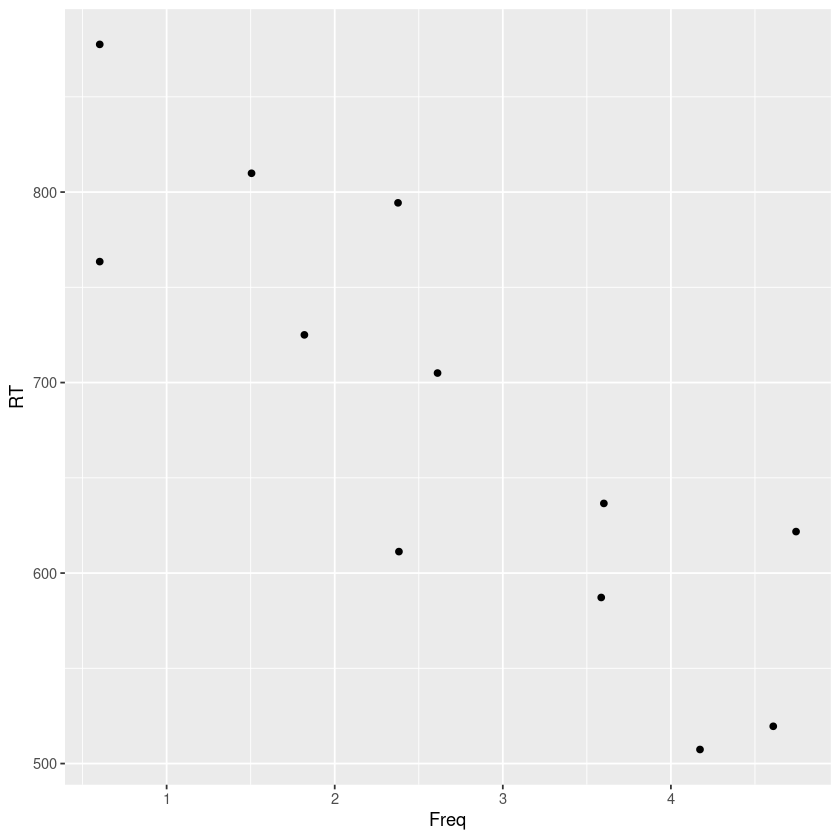

In [6]:
ggplot(df, aes(x=Freq, y=RT)) + geom_point()

5. Can you add a horizontal line showing the mean response duration using `geom_hline()` and the `yintercept` aesthetic?

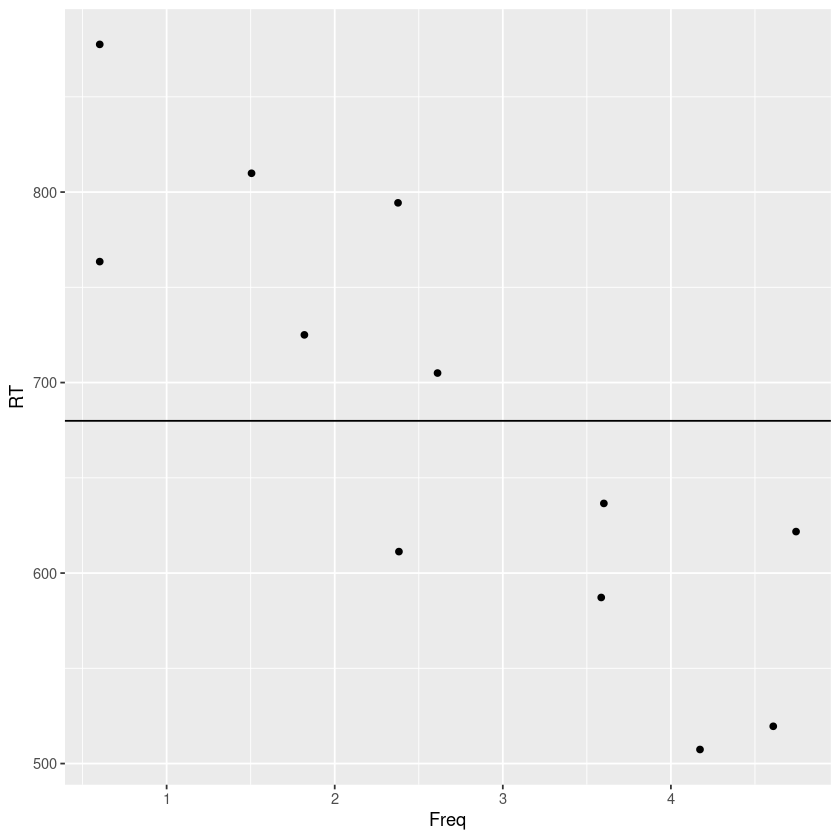

In [7]:
ggplot(df, aes(x=Freq, y=RT)) + geom_point() + geom_hline(yintercept=mean(df$RT))

6. Can you add the regression line from your model?

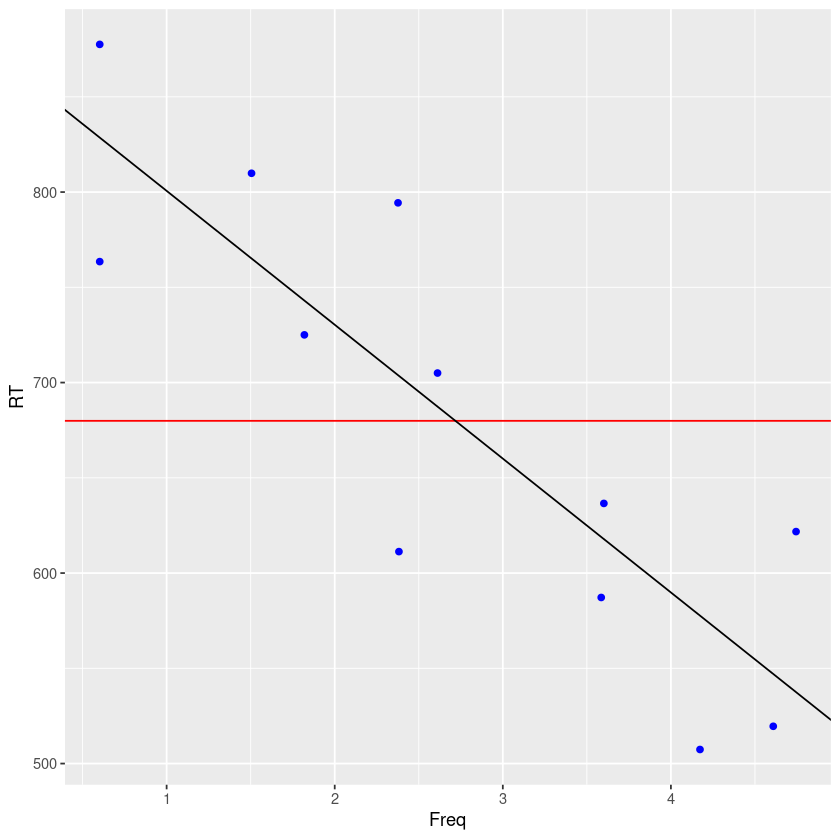

In [9]:
coefs = coefficients(model)
intercept = coefs[["(Intercept)"]]
slope = coefs[["df$Freq"]]

ggplot(df, aes(x=Freq, y=RT)) + geom_point(colour="blue") + 
geom_hline(yintercept=mean(df$RT), color="red") + 
geom_abline(intercept=intercept, slope=slope)

(7. Upload your Rmarkdown file (`.Rmd`) and a knitted document (`.html` or `.pdf`) to Canvas. (deadline: 19.10.2021, 23.59h CET))